# Product Segmentation Case Study

## Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.

## Objective

To perform an exploratory data analysis and cluster the products based on various factors


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?


## Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Let's start coding!

### Importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
f='/content/drive/MyDrive/aiml/Nutrient+Composition+Dataset.csv'
data = pd.read_csv(f)

In [ ]:
data.shape

(1746, 6)

* The dataset has 3268 rows and 8 columns

In [ ]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,S.No,Protein,Fat,vitaminC,Fiber,Product
1010,1011,-0.490958,-0.614748,-1.100076,-0.601097,"Alcoholic beverage, wine, beer"
1582,1583,-1.160201,0.340049,-0.892182,1.898395,"Bean, sporouted seeds"
47,48,1.668056,1.767883,1.666838,-0.675627,"Beef, flank, steak, separable lean and fat, tr..."
304,305,-0.361130,0.188898,-1.412071,0.792773,"Fish, grouper, mixed species, cooked, dry heat"
534,535,-0.629738,0.305815,-0.438456,0.019764,"Soup, chicken, canned, chunky, ready-to-serve"
1123,1124,-0.969034,1.090557,2.286335,-0.496590,"Sorghum flour, whole-grain"
48,49,0.504296,-0.946973,-0.023497,-1.129559,"Bagels, plain, enriched, with calcium propiona..."
1584,1585,-0.546106,-0.238144,1.517469,0.472610,"Bean, sporouted seeds"
302,303,-1.058150,0.278420,1.124066,0.219585,"Cereals, CREAM OF WHEAT, instant, prepared wit..."
1032,1033,-0.935125,0.592144,-0.360597,-0.578787,"Alcoholic beverage, wine, beer"


In [ ]:
d=data.copy()
d.drop('S.No',inplace=True,axis=1)
d['Product'].value_counts()

Alcoholic beverage, wine, beer                                                 542
Chicken, broilers or fryers, raw                                               284
Bean, sporouted seeds                                                           87
Drumstick pods, raw                                                              1
Pork, cured, ham, shank, bone-in, separable lean and fat, unheated               1
                                                                              ... 
Croutons, seasoned                                                               1
Crustaceans, crab, queen, cooked, moist heat                                     1
Crustaceans, spiny lobster, mixed species, cooked, moist heat                    1
Game meat, bison, top round, separable lean only, 1" steak, cooked, broiled      1
Muffin, blueberry, commercially prepared, low-fat                                1
Name: Product, Length: 836, dtype: int64

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()
df.drop('S.No',axis=1,inplace=True)

In [ ]:
df[df.duplicated(subset='Product',keep=False)]


,Protein,Fat,vitaminC,Fiber,Product
560,1.116764,-0.691570,-0.938773,0.089959,"Alcoholic beverage, wine, beer"
563,-0.402272,-0.794396,-1.001710,-1.389403,"Alcoholic beverage, wine, beer"
566,-1.429645,-1.350130,-0.655577,0.006988,"Alcoholic beverage, wine, beer"
570,-1.230083,-1.073734,-0.318906,-0.863062,"Alcoholic beverage, wine, beer"
574,-0.626129,-0.930487,-0.787744,-0.810510,"Alcoholic beverage, wine, beer"
...,...,...,...,...,...
1741,0.424120,1.676720,0.391732,0.858416,"Chicken, broilers or fryers, raw"
1742,2.238292,1.687965,0.724514,-1.355875,"Chicken, broilers or fryers, raw"
1743,-0.518927,-0.271354,0.210755,-1.029739,"Alcoholic beverage, wine, beer"
1744,-0.278244,1.296137,0.673087,0.031214,"Chicken, broilers or fryers, raw"


In [ ]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [ ]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Protein   1746 non-null   float64
 1   Fat       1746 non-null   float64
 2   vitaminC  1746 non-null   float64
 3   Fiber     1746 non-null   float64
 4   Product   1746 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.3+ KB


**We won't need Product_ID for analysis, so let's drop this column.**

In [ ]:
df.drop("Product", axis=1, inplace=True)

In [ ]:
# let's check for duplicate observations
df.duplicated().sum()

0

- There are 117 duplicate observations. We will remove them from the data.

In [ ]:
df = df[(~df.duplicated())].copy()

**Let's take a look at the summary of the data**

In [ ]:
df.describe()

,Protein,Fat,vitaminC,Fiber
count,1.746000e+03,1.746000e+03,1.746000e+03,1.746000e+03
mean,-6.872857e-12,-8.591072e-12,-5.727382e-13,7.445594e-12
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00
min,-1.471161e+00,-1.418308e+00,-1.443263e+00,-1.433311e+00
25%,-7.761675e-01,-7.964675e-01,-7.713125e-01,-8.165133e-01
50%,-1.745679e-01,-1.503757e-01,-1.665248e-01,-1.277286e-01
75%,5.943651e-01,6.287443e-01,6.104591e-01,6.301339e-01
max,4.935689e+00,4.853568e+00,4.991719e+00,4.259645e+00


**Observations**

- 0 in the listing price indicates missing values.
- The average listing price is 7046.
- The average sale price is 5983.
- The average discount is 28%.
- The average rating is 3.3.
- The average number of reviews is 42.

In [ ]:
# checking missing values
df.isna().sum()

Protein     0
Fat         0
vitaminC    0
Fiber       0
dtype: int64

- There are no missing values in the data.

## EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

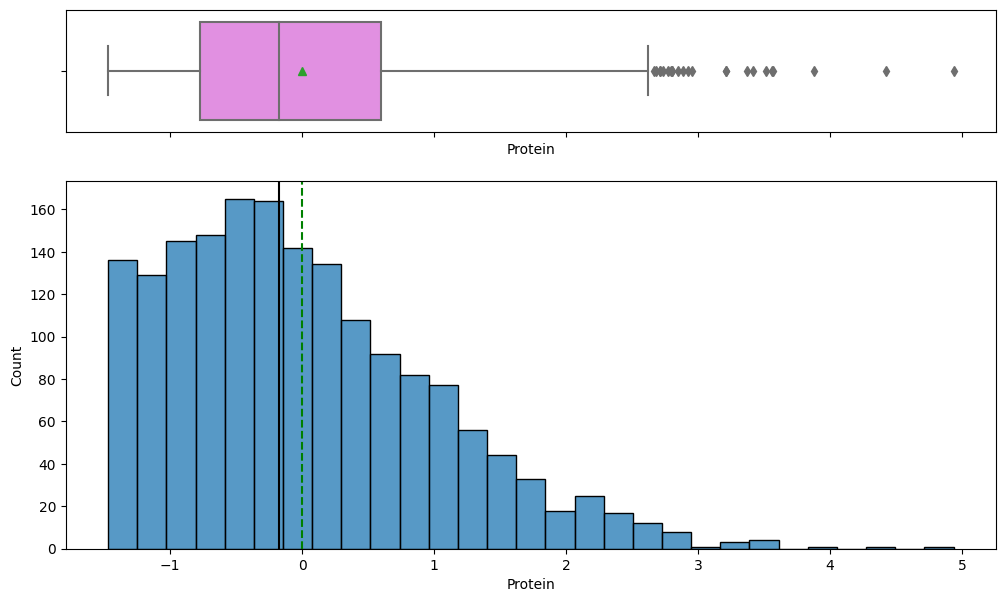

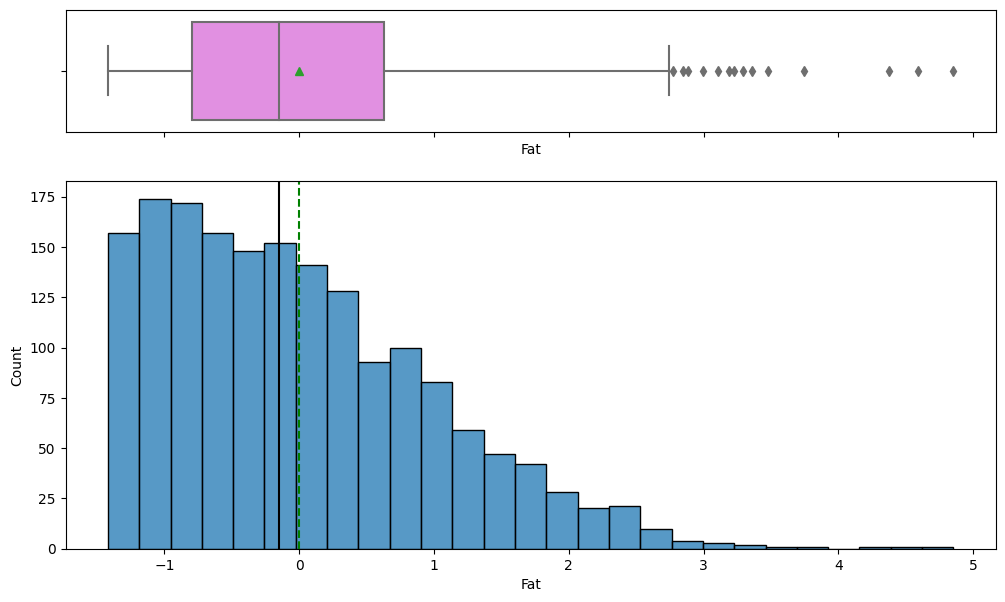

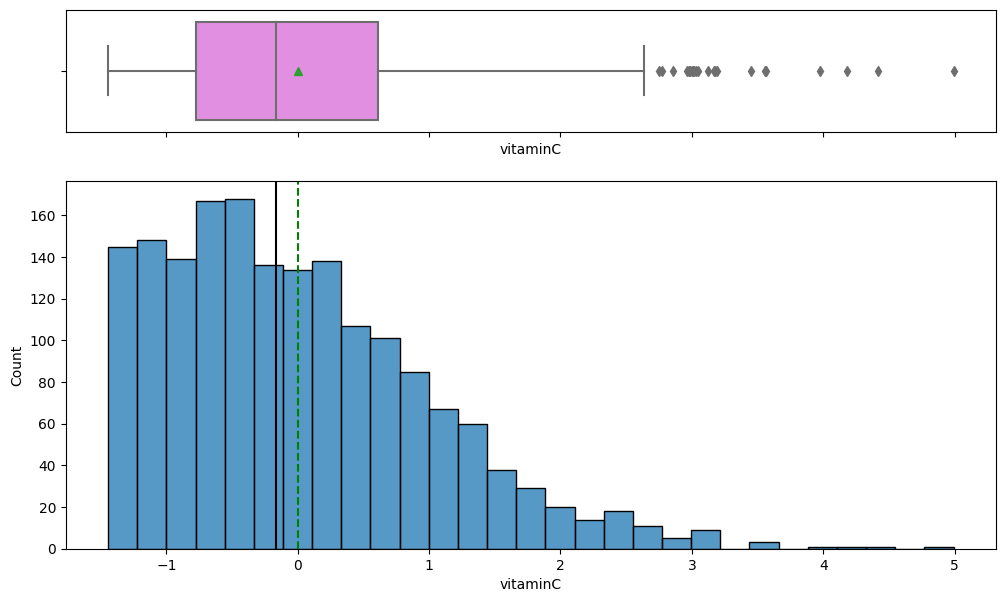

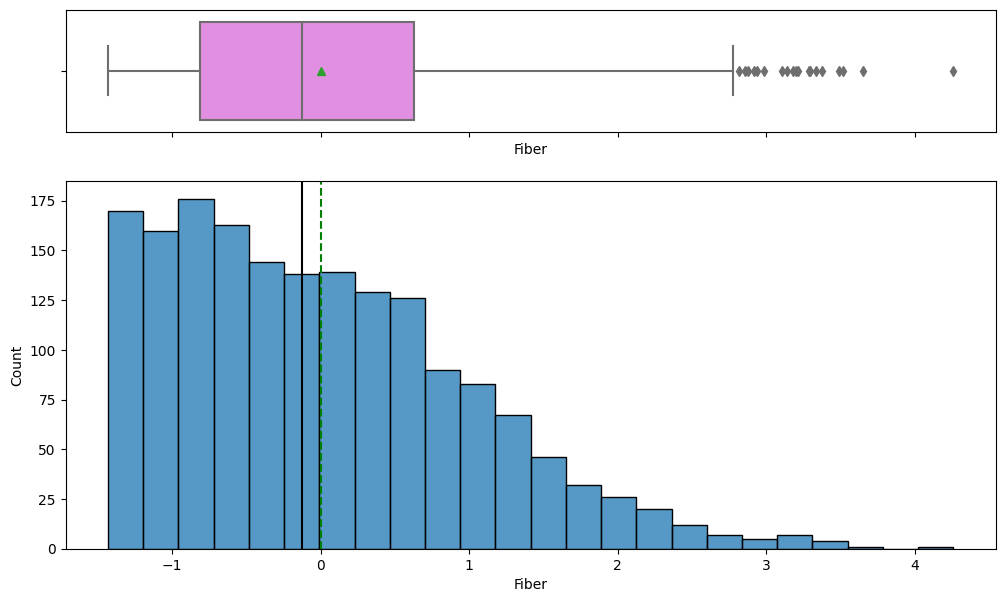

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Listing price and sale price have right-skewed distributions with upper outliers, which indicates the presence of very expensive products.
- The maximum discount given is 60%.
- Rating is left-skewed and most of the ratings are between 2.5 and 4.5.
- The number of reviews is between 1 and 100, with an outlier value above 200.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
50
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


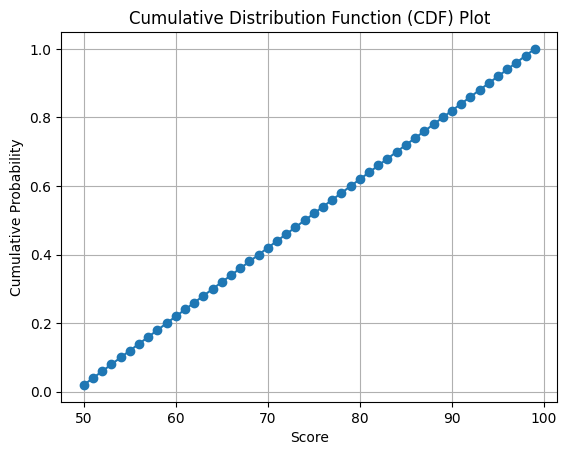

In [ ]:

# Your dataset
data = [80, 85, 90, 75, 92, 78, 88, 95, 82, 89,
        70, 84, 87, 91, 79, 83, 86, 94, 72, 77,
        81, 76, 73, 93, 74, 96, 68, 98, 71, 69,
        65, 99, 66, 97, 67, 62, 60, 63, 64, 61,
        59, 55, 58, 57, 54, 56, 53, 52, 51, 50]

# Sort the data
sorted_data = np.sort(data)

# Calculate cumulative probabilities
print(np.arange(1, len(sorted_data) + 1))
print(len(sorted_data))
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
print(cumulative_prob)
# Create the CDF plot
plt.plot(sorted_data, cumulative_prob, marker='o', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) Plot')
plt.grid(True)
plt.show()


IndexError: ignored

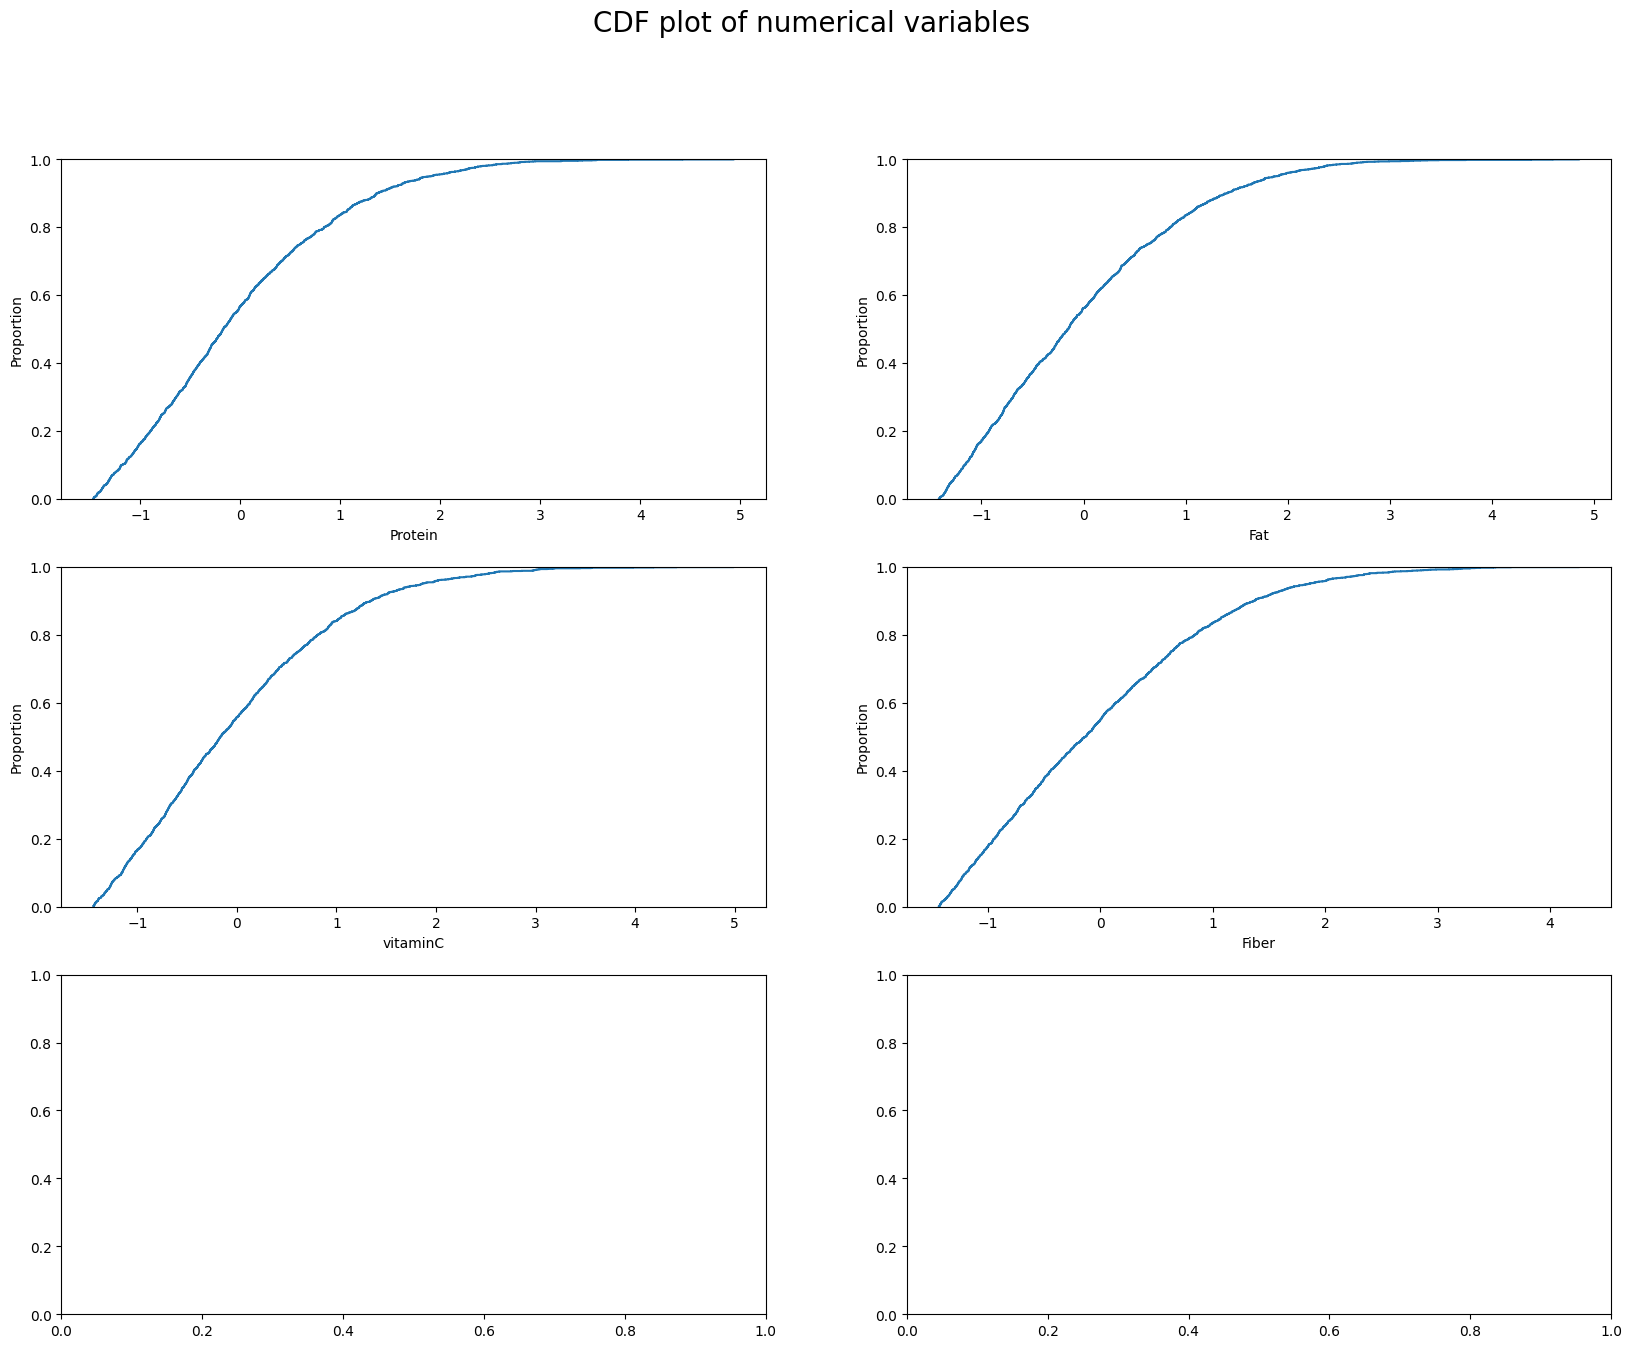

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- 90% of the products have listing prices less than 15000.
- 95% of the product have a sale price of less than 15000.
- 80% of the products have at least 50% discount or less than 50%.
- 50% off the products have a rating of 3.5 or less than 3.5.
- Almost all products have 100 or fewer reviews.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# let's explore discounts further
labeled_barplot(df, "Discount", perc=True)

KeyError: ignored

**Observations**

- 37.6% of products did not have any discounts.
- More than 50% of the products have 40-50% discount.

## Bivariate Analysis

**Let's check for correlations.**

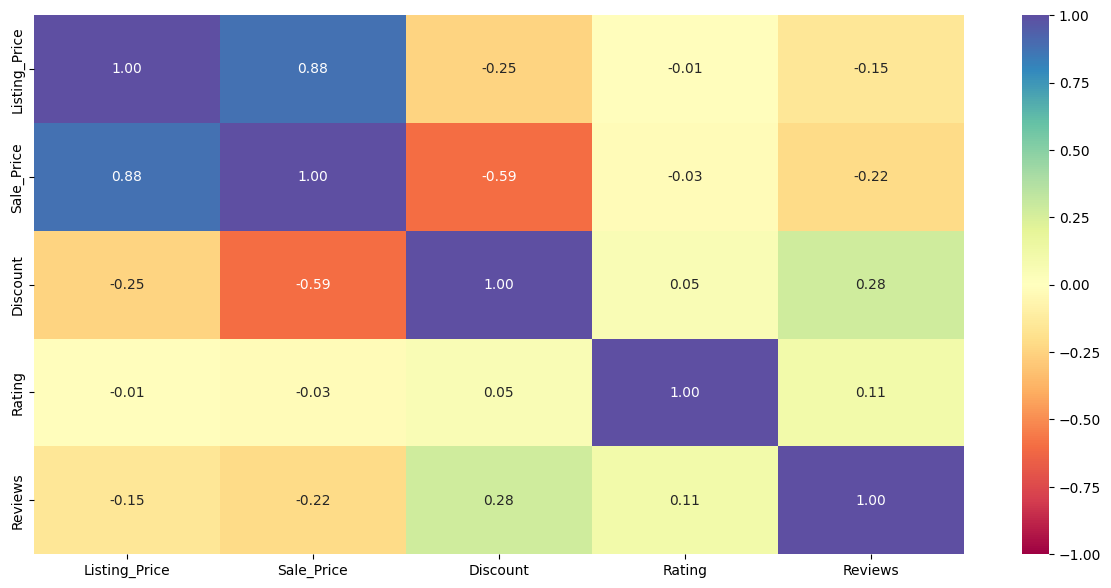

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- The sale price and the listing price are highly positively correlated, which is obvious.
- Discount is somewhat negatively correlated with listing price or sale price, which indicates that expensive products either have fewer discounts or no discounts at all.

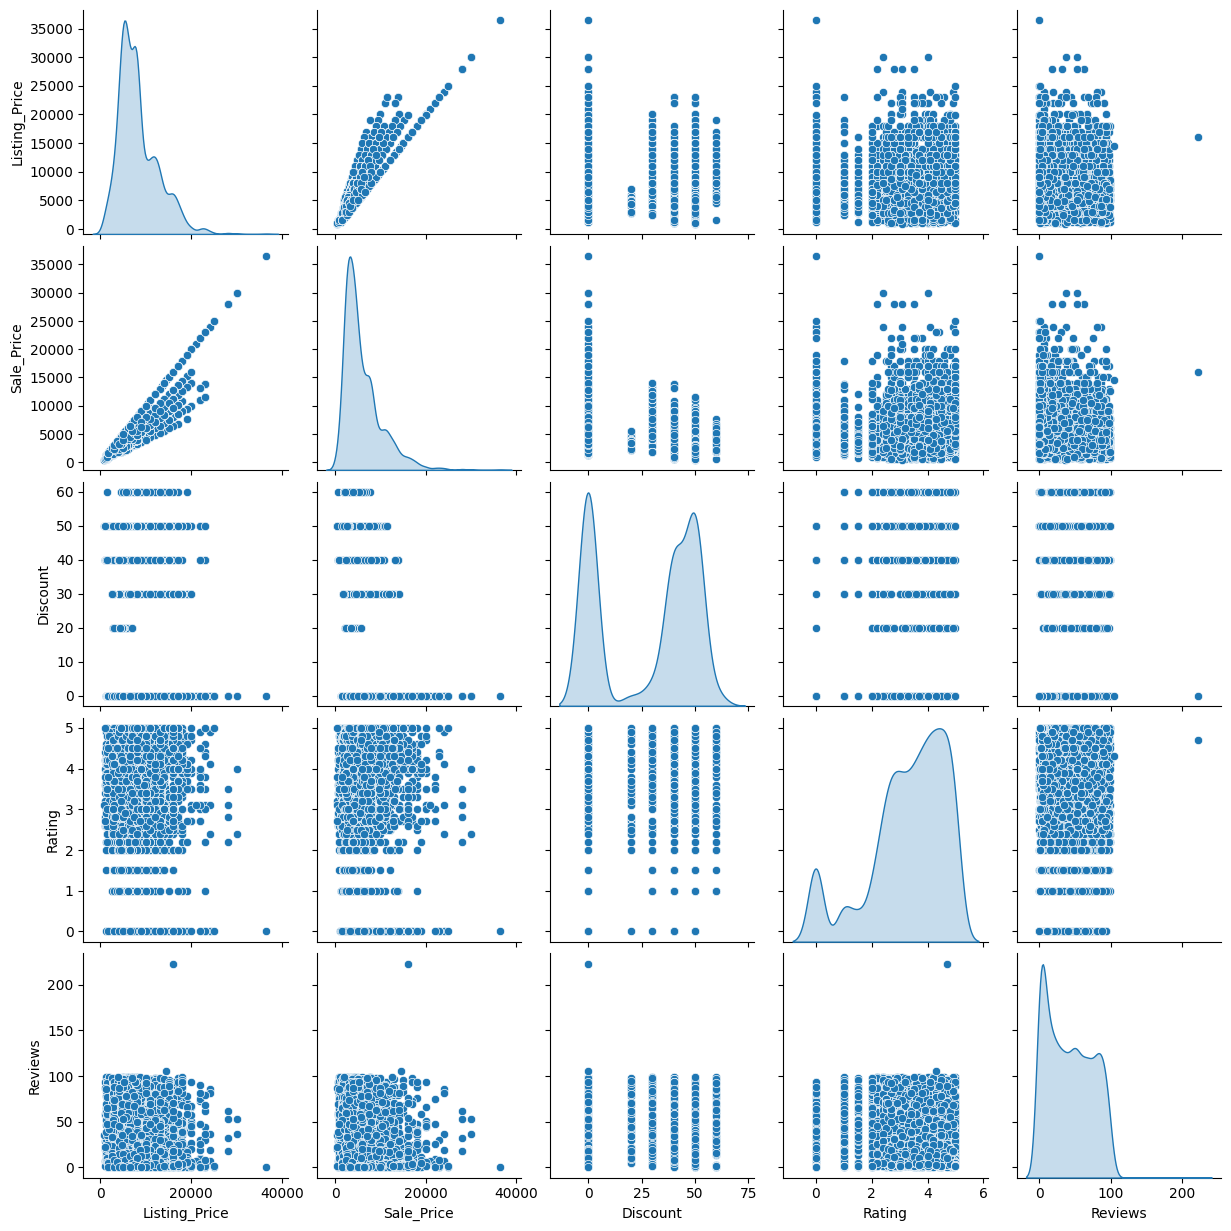

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- 50-60% discounts are mostly given to products whose listing price is 10,000 or less.
- Many products have no discount.
- As seen before, most of the products have 100 or fewer reviews.

## Data Preprocessing

In [ ]:
# variables used for clustering
num_col

['Protein', 'Fat', 'vitaminC', 'Fiber']

In [ ]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

,Protein,Fat,vitaminC,Fiber
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


## Hierarchical Clustering

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6391818886918261.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7162924652763346.
Cophenetic correlation for Euclidean distance and average linkage is 0.7664519011885238.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6047194146480928.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5854266041780847.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6326026537632393.
Cophenetic correlation for Chebyshev distance and average linkage is 0.717763178117288.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5648124256800041.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6325008742275654.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5639959857083506.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7444978421334875.
Cophenetic cor

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.779045948953341, which is obtained with Cityblock distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6391818886918261.
Cophenetic correlation for complete linkage is 0.7162924652763346.
Cophenetic correlation for average linkage is 0.7664519011885238.
Cophenetic correlation for centroid linkage is 0.7560310240212.
Cophenetic correlation for ward linkage is 0.5416485654617125.
Cophenetic correlation for weighted linkage is 0.6047194146480928.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7664519011885238, which is obtained with average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["ward", "centroid"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    # if high_cophenet_corr < c:
    #     high_cophenet_corr = c
    #     high_dm_lm[0] = "euclidean"
    #     high_dm_lm[1] = lm

Cophenetic correlation for ward linkage is 0.45786619671650625.
Cophenetic correlation for centroid linkage is 0.662354858662845.


**Observations**

- We see that the cophenetic correlation is maximum with cityblock distance, which is the Manhattan distance, and average linkage.
- The cophenetic correlation with Euclidean distance and average linkage is slightly less than the combination with maximum cophenetic correlation.


**Let's see the dendrograms for the different linkage methods.**

In [ ]:
subset_scaled_df.head(5)

,Protein,Fat,vitaminC,Fiber,HC_Clusters
0,-0.749825,0.426892,0.287212,1.279936,1
1,2.230835,-0.304578,-0.881972,-0.387079,0
2,-0.060478,0.451551,2.450659,1.729280,1
3,-0.330121,-0.508314,-1.008903,-0.848201,2
4,-1.259850,-0.560451,-1.255896,-0.548145,2


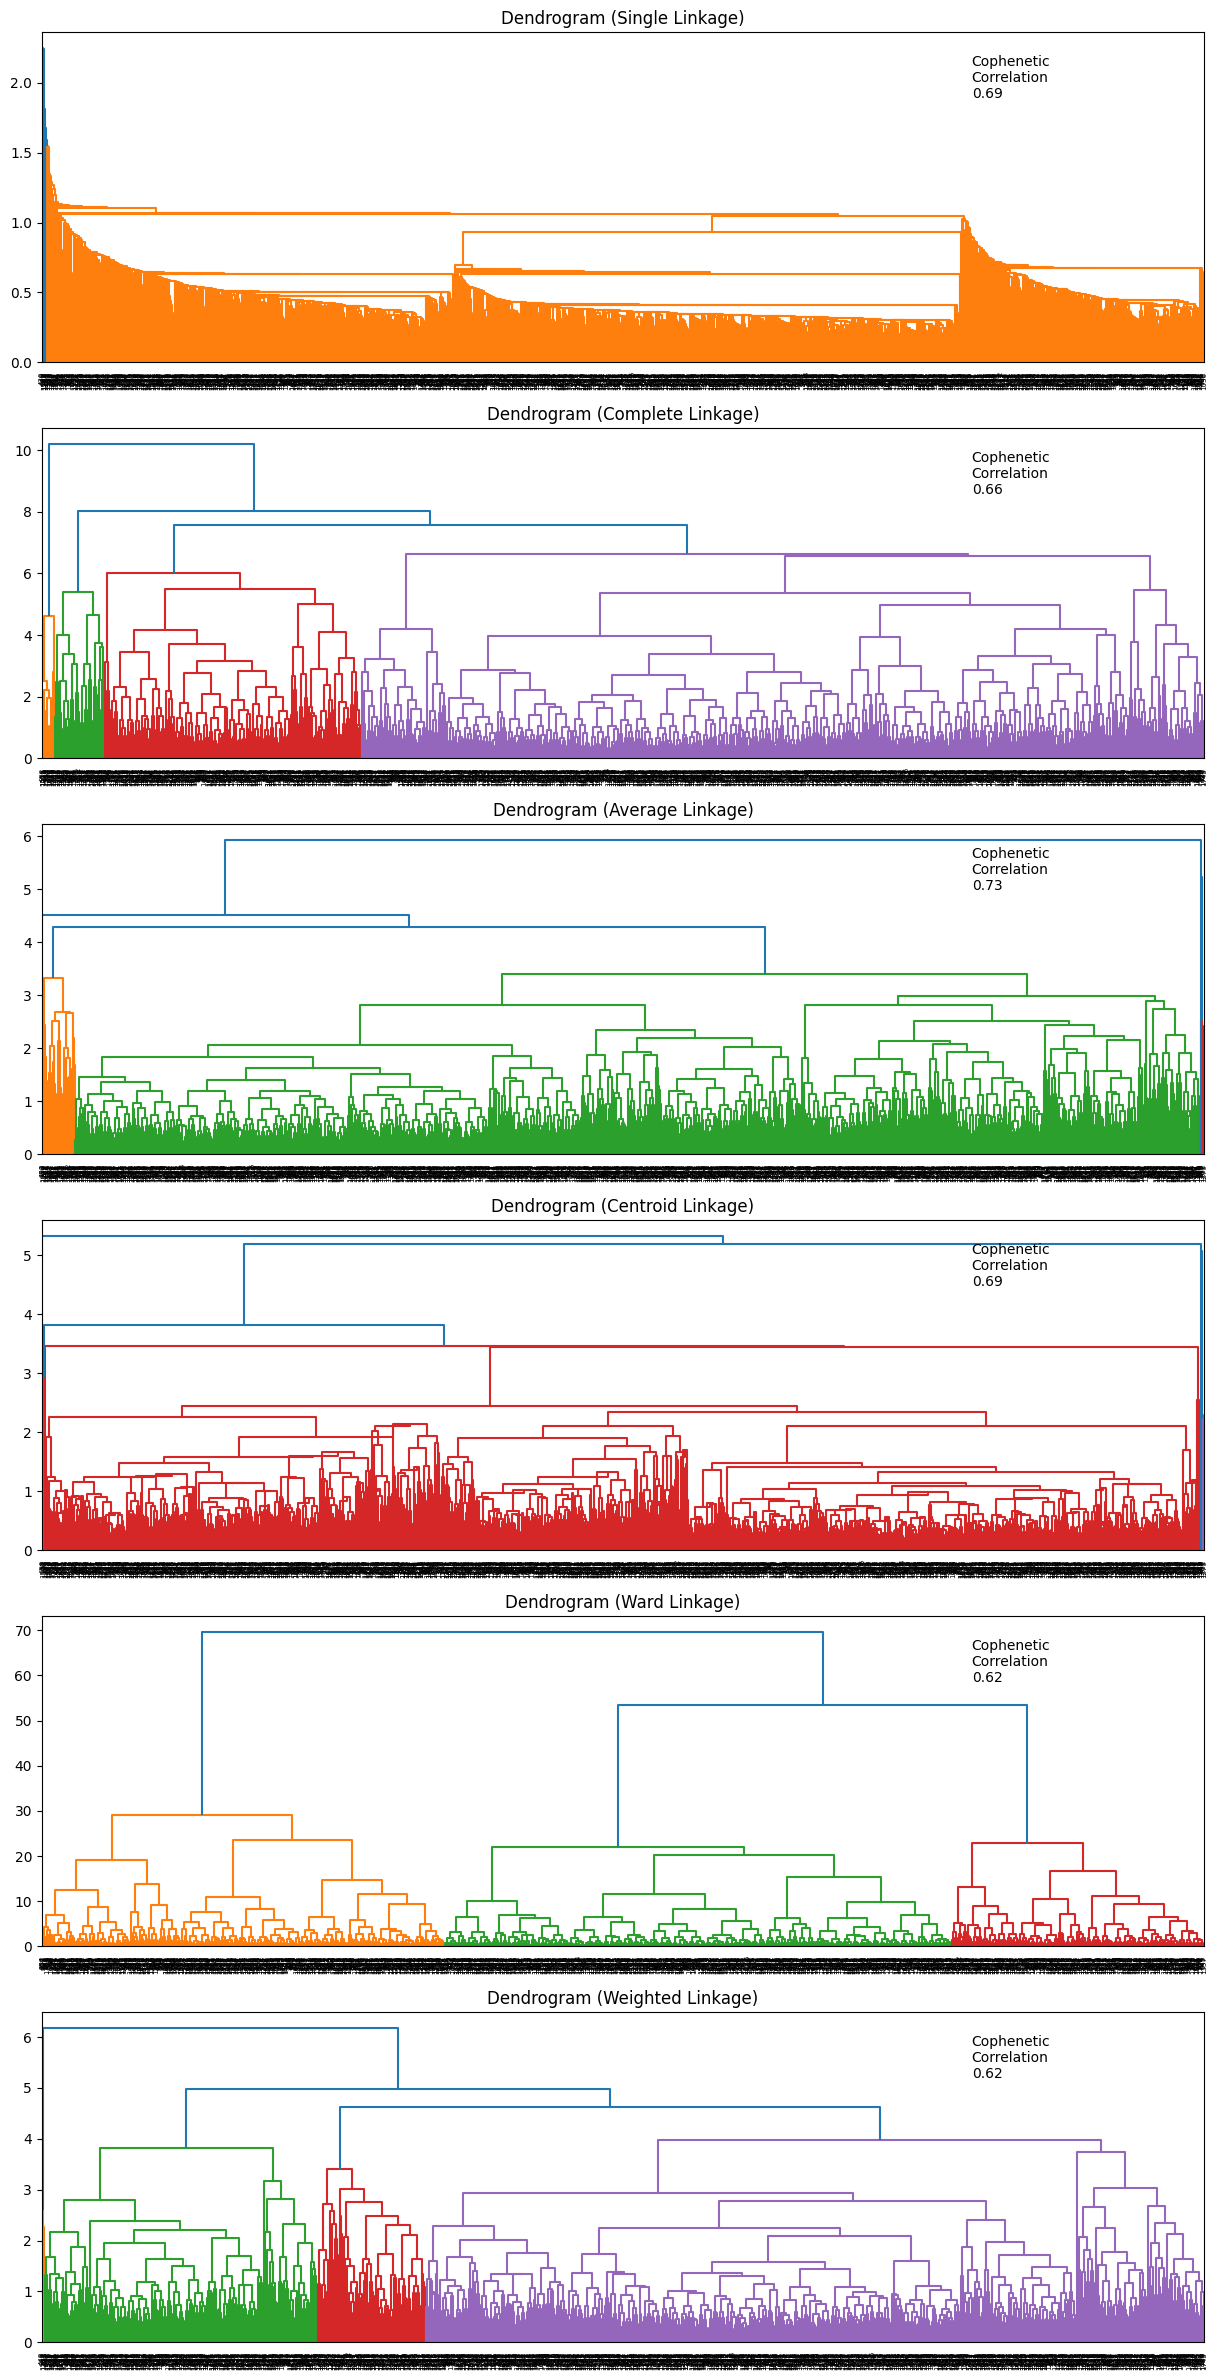

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage shows distinct and separate clusters.

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.639182
1,complete,0.716292
2,average,0.766452
3,centroid,0.756031
4,ward,0.541649
5,weighted,0.604719


**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

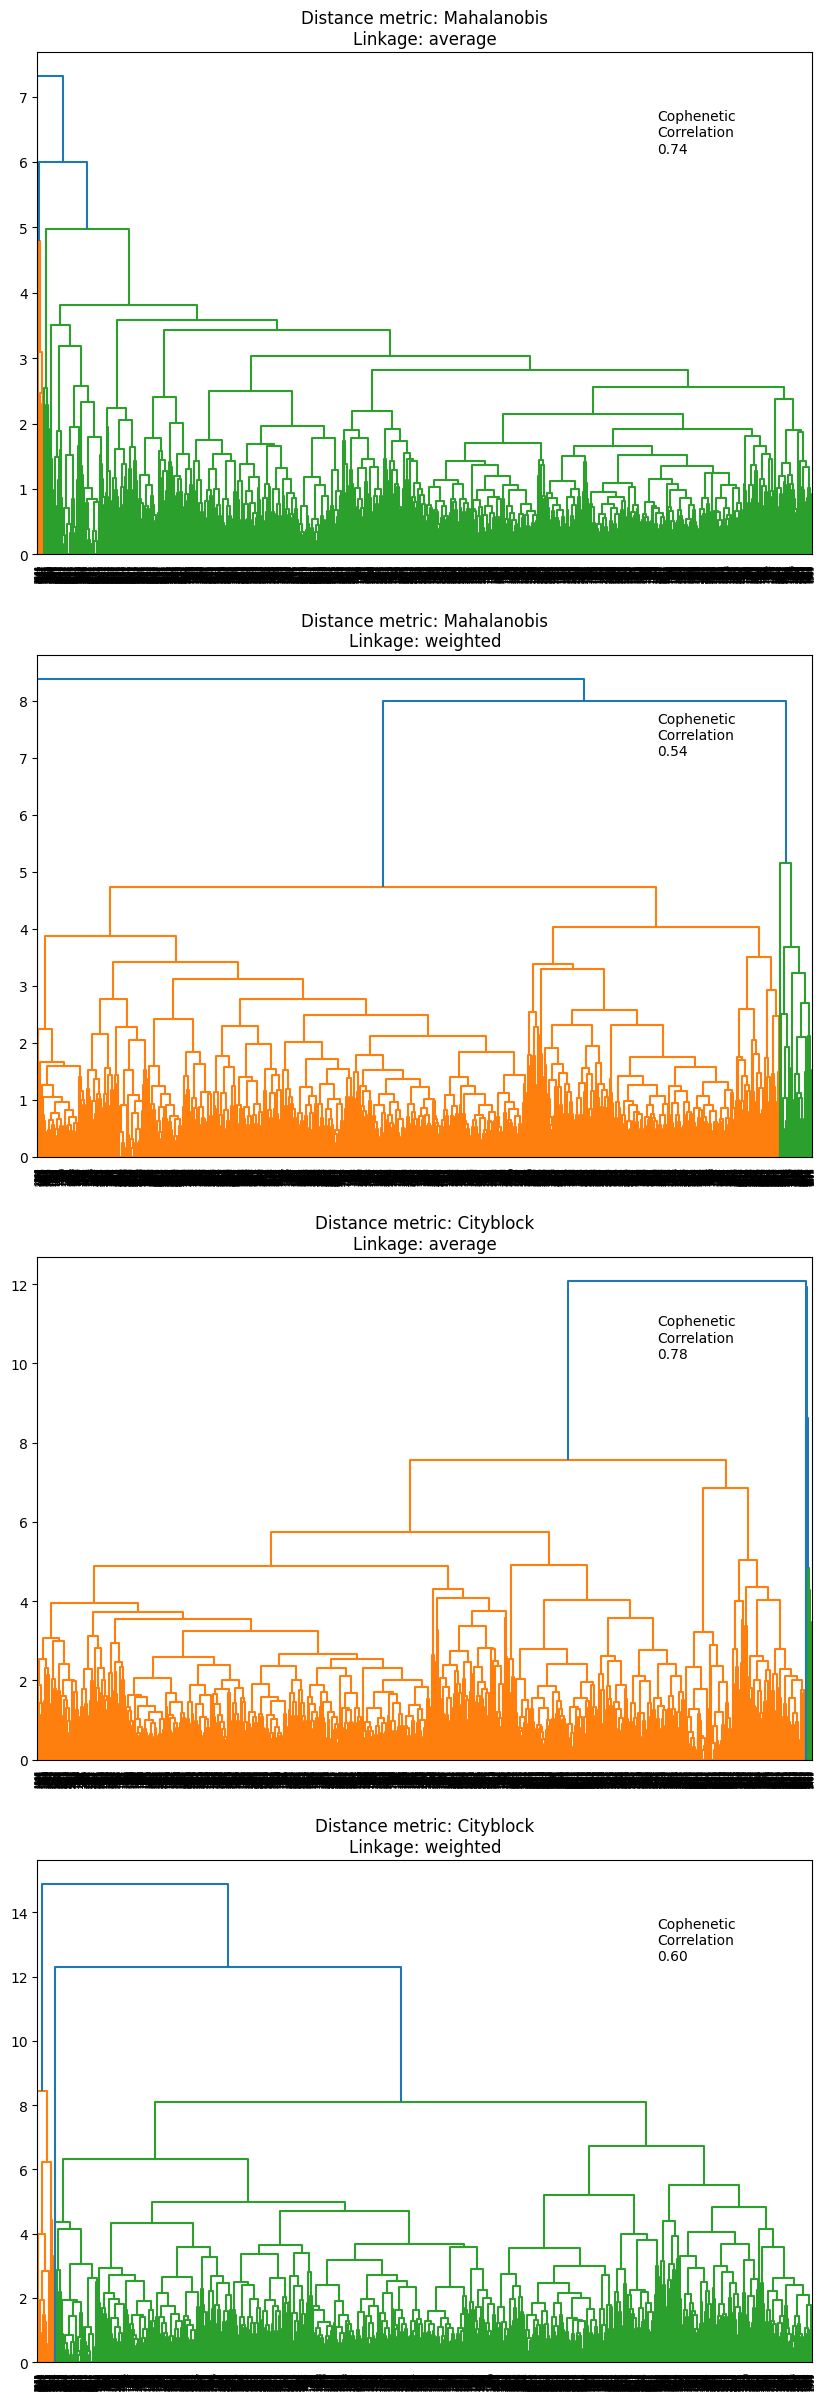

In [ ]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

**Let's create 3 clusters.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [ ]:
df

,Protein,Fat,vitaminC,Fiber,HC_Clusters
0,-0.749825,0.426892,0.287212,1.279936,1
1,2.230835,-0.304578,-0.881972,-0.387079,0
2,-0.060478,0.451551,2.450659,1.729280,1
3,-0.330121,-0.508314,-1.008903,-0.848201,2
4,-1.259850,-0.560451,-1.255896,-0.548145,2
...,...,...,...,...,...
1741,0.424120,1.676720,0.391732,0.858416,0
1742,2.238292,1.687965,0.724514,-1.355875,0
1743,-0.518927,-0.271354,0.210755,-1.029739,2
1744,-0.278244,1.296137,0.673087,0.031214,0


## Cluster Profiling

In [ ]:
c=df[df['HC_Clusters'] == 2]
print(c.head(5))
print(c.size)
print(df.size)
d=data[data['Product'].str.contains('Alcohol',case=False)]
common=c.index.intersection(df.index)
print(common)
#c['Product']=df['Product']

    Protein       Fat  vitaminC     Fiber  HC_Clusters
3 -0.330121 -0.508314 -1.008903 -0.848201            2
4 -1.259850 -0.560451 -1.255896 -0.548145            2
5  0.549775 -1.049436 -0.566616 -0.820785            2
6 -0.910622 -0.351360 -0.559536  0.322276            2
9 -0.516439 -1.311063  0.838666 -0.896243            2
3810
8730
Int64Index([   3,    4,    5,    6,    9,   12,   15,   16,   19,   22,
            ...
            1714, 1719, 1720, 1722, 1723, 1724, 1728, 1729, 1734, 1743],
           dtype='int64', length=762)


In [ ]:
data['HC_Clusters']=HCmodel.labels_
data.head()
d2=data[data['HC_Clusters'] == 2]
d2.head()
d2['Product'].value_counts()

Alcoholic beverage, wine, beer                                        462
Chicken, broilers or fryers, raw                                       20
Bean, sporouted seeds                                                  11
Infant formula, GERBER, GOOD START 2 Soy, with iron, ready-to-feed      1
Martha White Foods, Martha White's Chewy Fudge Brownie Mix, dry         1
                                                                     ... 
Cookies, fig bars                                                       1
Chicken, broilers or fryers, leg, meat only, cooked, fried              1
Cookies, oatmeal, commercially prepared, regular                        1
Cookies, oatmeal, commercially prepared, special dietary                1
Fish, bluefish, raw                                                     1
Name: Product, Length: 272, dtype: int64

In [ ]:
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile

,Protein,Fat,vitaminC,Fiber
HC_Clusters,,,,
0,0.702335,0.946056,-0.177546,-0.103819
1,-0.319909,-0.270845,1.111710,1.040273
2,-0.398513,-0.616423,-0.411972,-0.434977


In [ ]:
pca=PCA(n_components=3)
r=pca.fit_transform(subset_scaled_df)
pca.explained_variance_ratio_

array([0.4028972 , 0.27472186, 0.13488219])

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Sale_Price"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightRed", axis=0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
HC_Clusters,,,,,,
0,7713.665285,7207.118135,0.891192,3.011295,30.126425,965
1,6188.557740,3358.597666,45.503686,3.347604,48.585995,1628
2,15138.686380,11523.822581,23.028674,3.579570,42.704301,558


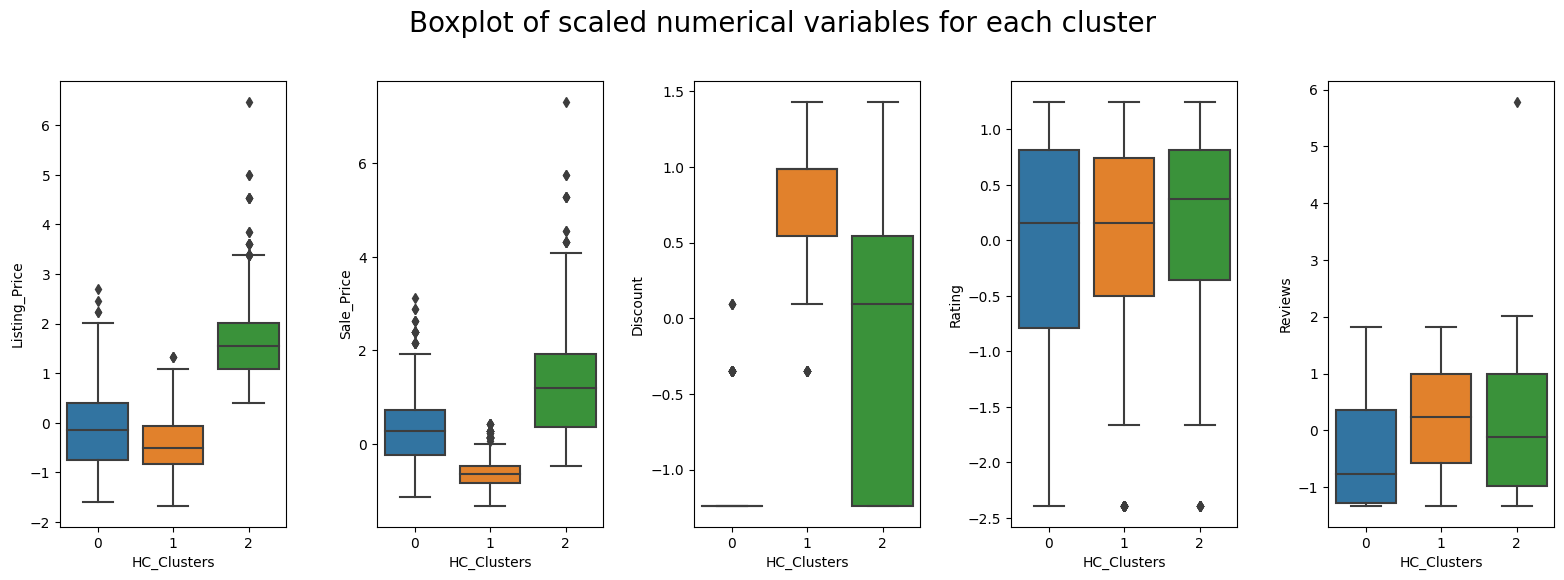

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

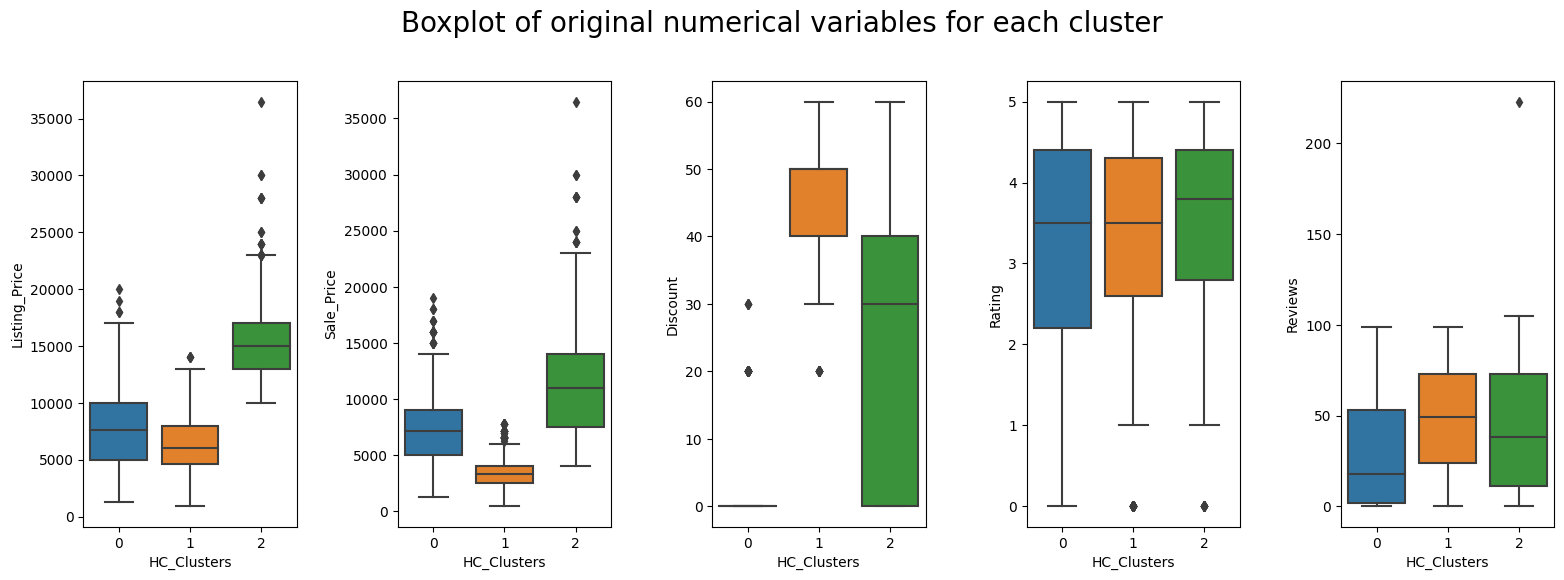

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**:
    - This cluster contains medium-priced products, with a median listing price of approximately 7500.
    - Almost no discount is given to products in these clusters.
    - The median rating of this cluster is around 3.5, suggesting that customers are satisfied with 50% of the products in this cluster.
    - Products in these clusters have got lesser reviews, which can be because these products are very expensive and fewer people buy them.
   

- **Cluster 1**:
    - Listing price is low for products in this cluster, and the sale price is lower, as there are heavier discounts on these products.
    - Almost all the products have discounts between 30% to 40%.
    - 50% of products have a rating from 3.5 to 5 which indicates that customer satisfaction varies across products in this cluster.
    - On average, 50 reviews are given to products in this cluster.
    

- **Cluster 2**:
    - This cluster contains more expensive premium products, with a median listing price of approximately 15000 and a median sale price of 11000.
    - The discount for products in this cluster varies from 0% to 60%.
    - Rating is very high.

**Let's compare Cluster vs Brand**

In [ ]:
pd.crosstab(df.HC_Clusters, df.Brand).style.highlight_max(color="lightgreen", axis=0)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
HC_Clusters,,,,,
0,0,249,214,115,387
1,0,861,469,298,0
2,1,1,223,193,140


**Observations**
- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

## Business Recommendations

- Cluster 2 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.

- Cluster 2 products can also be made available in showrooms situated in premium locations because people generally tend to buy premium products from showrooms.

- Cluster 1 consists of products that are sold at higher discounts, so these might be the ones that are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.

- Cluster 0 consists of products with comparatively low and medium prices with almost no discount, so general marketing campaigns can be done for these to target the general public.